In [5]:
import itertools
import json

import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/matth/Desktop/ADSProject1/data/philosophy_data.csv')
stopwords = set(nltk.corpus.stopwords.words('english'))

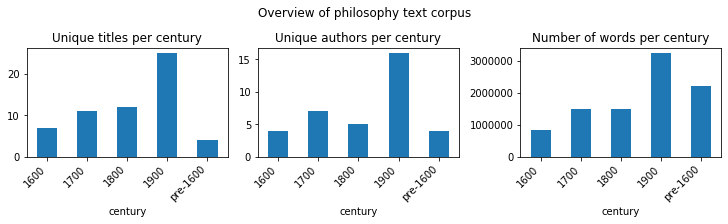

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=3, constrained_layout=True, figsize=(10, 3))
plt.suptitle('Overview of philosophy text corpus')

df['tokenized_txt_list'] = df['tokenized_txt'].apply(lambda x: json.loads(x.replace("'", "\"")))
df['century'] = (df['original_publication_date'] // 100) * 100
df.loc[df['century'] < 1600, 'century'] = 'pre-1600'

df.groupby('century')['title'].nunique().plot(kind='bar', title='Unique titles per century', ax=ax[0])

df.groupby('century')['author'].nunique().plot(kind='bar', title='Unique authors per century', ax=ax[1])

words_by_century = df.groupby('century')['tokenized_txt_list'].apply(lambda x: list(itertools.chain.from_iterable(x)))
words_by_century.apply(len).plot(kind='bar', title='Number of words per century', ax=ax[2])

for i in range(len(ax)):
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha='right')

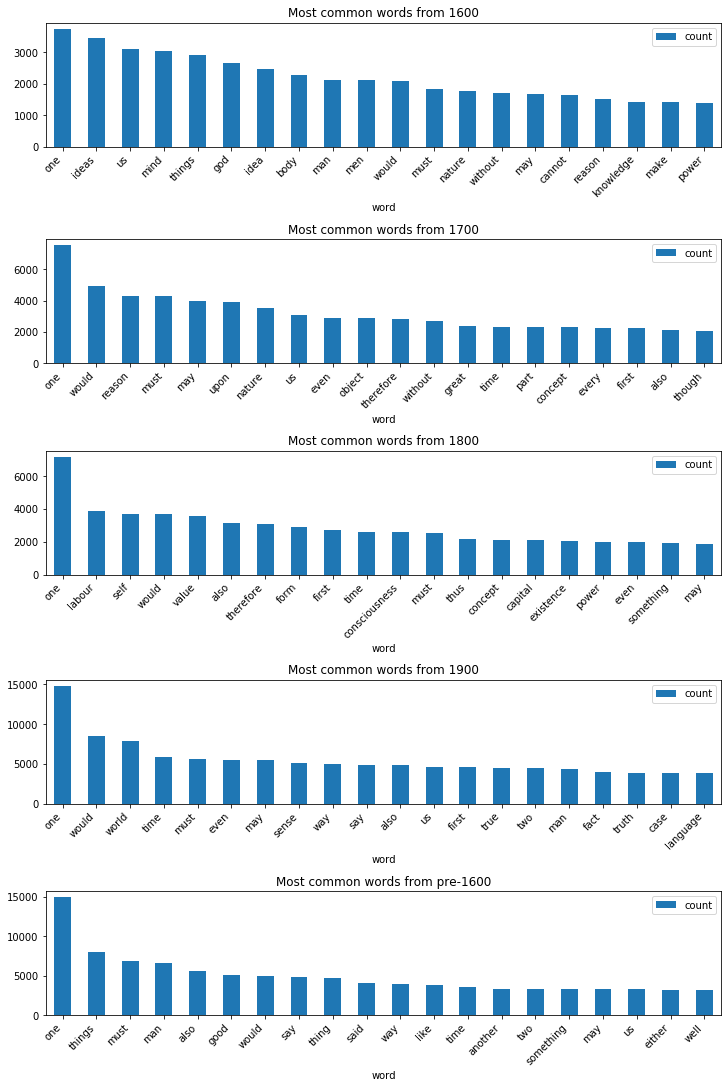

In [48]:
fig, ax = plt.subplots(nrows=words_by_century.shape[0], figsize=(10, 15), constrained_layout=True)

wcs = []
for i, (century, words) in enumerate(words_by_century.iteritems()):
    words, counts = np.unique(words, return_counts=True)
    wc = pd.DataFrame({'word': words, 'count': counts})
    wc = wc[~wc['word'].isin(stopwords)].sort_values('count', ascending=False)
    wc.iloc[:20,].plot(x='word', y='count', kind='bar', title=f'Most common words from {century}', ax=ax[i])

for i in range(len(ax)):
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha='right')